# Evaluating effective parameters on the death ratio of CoVid-19

In the year 2020 world encounters a pandemic of CoVid-19. unfortunately, lots of people died, the rate of death between patients is 2%. This research aims to find the reasons for increasing the death ratio. In this study, a comprehensive database of daily cases and death in all countries are used. Furthermore, the local reasons are also evaluated like the gross domestic product (GDP) per capita of countries which shows the commonwealth of nations.

First, the daily new cases and death are obtained from the European Centre for Disease Prevention and Control.

In [12]:
data = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv")
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,07/11/2020,7,11,2020,58,2,Afghanistan,AF,AFG,38041757.0,Asia,3.538217
1,06/11/2020,6,11,2020,40,0,Afghanistan,AF,AFG,38041757.0,Asia,3.546103
2,05/11/2020,5,11,2020,121,6,Afghanistan,AF,AFG,38041757.0,Asia,3.745884
3,04/11/2020,4,11,2020,86,4,Afghanistan,AF,AFG,38041757.0,Asia,3.782685
4,03/11/2020,3,11,2020,95,3,Afghanistan,AF,AFG,38041757.0,Asia,3.787943


These data are tallied up to find all cases and death during the second half of the year 2020.

In [66]:
data_filtered = data[data['dateRep'] >= '01/06/2020']
tab = data_filtered.groupby(['countriesAndTerritories']).sum()
tab[['cases', 'deaths']]

,cases,deaths
countriesAndTerritories,,
Afghanistan,41786,1552
Albania,23183,546
Algeria,60508,2009
Andorra,5127,71
Angola,12102,299
...,...,...
Wallis_and_Futuna,1,0
Western_Sahara,766,1
Yemen,2070,600


Then, the number of death vs. the number of cases are evaluated for each country.
The regression fitted model shows the mortality of CoVid-19 is about 2.2%.

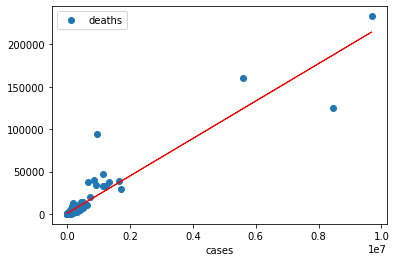

In [67]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
X = tab[['cases']]
y = tab[['deaths']]
reg = LinearRegression().fit(X, y)
tab.plot(x='cases', y='deaths', style='o')
plt.plot(X, reg.predict(X), color='red', linewidth=1)

In [68]:
reg.coef_*100

array([[2.20742261]])

The figure below shows all mortality ratios in countries, which has a 2% mean with a 2.5% standard deviation.

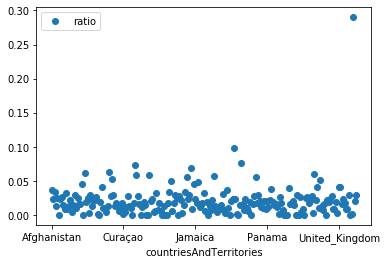

In [70]:
tab['ratio'] = tab['deaths'] / tab['cases']
tab.reset_index()
tab.plot( y='ratio', use_index=True, style='o')

In [71]:
tab['ratio'].mean()

0.020677107645419968

In [72]:
tab['ratio'].std()

0.024770414320198098

A new database imported from the international monetary fund shows the GPD per capita of countries in 2020. This data merged with previous data about the mortality of CoVid-19 in these countries.

In [ ]:
import pandas as pd
url1 = "https://www.imf.org/en/Publications/WEO/weo-database/2020/October/weo-report?c=512,914,612,614,311,213,911,314,193,122,912,313,419,513,316,913,124,339,638,514,218,963,616,223,516,918,748,618,624,522,622,156,626,628,228,924,233,632,636,634,238,662,960,423,935,128,611,321,243,248,469,253,642,643,939,734,644,819,172,132,646,648,915,134,652,174,328,258,656,654,336,263,268,532,944,176,534,536,429,433,178,436,136,343,158,439,916,664,826,542,967,443,917,544,941,446,666,668,672,946,137,546,674,676,548,556,678,181,867,682,684,273,868,921,948,943,686,688,518,728,836,558,138,196,278,692,694,962,142,449,564,565,283,853,288,293,566,964,182,359,453,968,922,714,862,135,716,456,722,942,718,724,576,936,961,813,726,199,733,184,524,361,362,364,732,366,144,146,463,528,923,738,578,537,742,866,369,744,186,925,869,746,926,466,112,111,298,927,846,299,582,487,474,754,698,&s=NGDPDPC,&sy=2020&ey=2020&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1"
s=requests.get(url1).content
c=pd.read_html(url1)
df = c[0]
df.head(10)

In [73]:
tab = tab.reset_index(drop=False)
result = pd.concat([tab, df], axis=1, join='inner', sort=False)
result.head()

,countriesAndTerritories,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,ratio,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2020
0,Afghanistan,4777,1726,601959,41786,1552,1.133644e+10,1521.257286,0.037142,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,NaN,499.441
1,Albania,3865,1637,488840,23183,546,6.927073e+08,10166.198125,0.023552,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,NaN,4898.277
2,Algeria,4821,1741,612059,60508,2009,1.304508e+10,1877.639157,0.033202,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,NaN,3331.076
3,Andorra,3798,1622,478740,5127,71,1.805395e+07,83888.837838,0.013848,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,NaN,2021.310
4,Angola,3670,1598,462580,12102,299,7.287993e+09,459.213282,0.024707,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,NaN,14158.571


This figure shows the CoVid-19 motrality ratio vs. the GDP per capita of counties. This figure shows that the countires with better commonwealth  situtaion hase relatively less mortality by CoVid-19. 

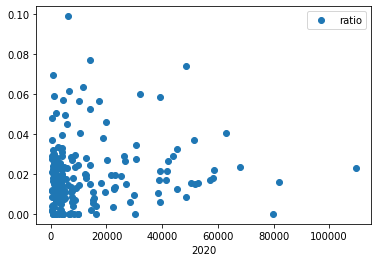

In [74]:
result.dropna
result.plot(x='2020', y='ratio', style='o')

This research planned to evaluted all related reasons to reduce the number of mortality of CoVid-19.